In [1]:
#Workshop 1 : ประเมิณ Model
y = [100, 50, 30, 20] # ค่า y จากข้อมูลของจริง
y_predict = [90, 50, 50, 30]  # ค่า y สมมติว่าได้จากการทำนายด้วย model

#MAE abs(y[i]-y[i]_predict)
(10+0+20+10)/4
#MAE โดย sklearn.metrics import mean_squard_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y,y_predict)

#MSE 1/N * (y[i]-y[i]_mean)**2
(10**2 + 0**2 + 20**2 + 10**2)/4
#MSE ด้วย sklearn.metrics
mean_squared_error(y,y_predict)
MSE = (10**2 + 0**2 + 20**2 + 10**2)/4

#RSME  sqrt(1/N *(y[i]-y[i]_mean)**2)
import numpy as np
np.sqrt(MSE)
#RMSE ด้วย sci-learn
np.sqrt(mean_squared_error(y,y_predict))
#MAE เป็นค่าเฉลี่ยการเคลื่อนที่สามารถบอกระยะคลาดเคลื่อน(Average Error)
#RMSE ได้รับความนิยมมากกว่า เนื่องจากสามารถแปลความหมายเป็นหน่วยของ y ได้


12.24744871391589

In [2]:
#Workshop 2 : การประเมิน Model ด้วย library
# model = LinearRegression()
# model.fit(x,y)
# จาก workshop 2 บทที่ 13 จะได้ model
# ทำการประเมิน โดย import ฟังก์ชันที่ใช้ในการประเมิน
from sklearn.externals import joblib

model = joblib.load('my_model.pkl') # โหลด Nodel จากไฟล์ .pkl มาใช้งาน
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
x_input = [1.0 , 1.8, 3.0, 4.1, 5.2, 6.0]
x_input =np.array(x_input).reshape(-1,1)
y_predict = model.predict(x_input)
y_predict
y_output = [1,1.3,2.2,2.5,2.8,3.6]
model.score(x_input,y_output) # 1.เทียบค่าจริง :ค่า R2 score ค่า ความแม่นยำของ model อยู่ที่ 96.85
r2_score(y_output, y_predict) # 2.เทียบค่าจริงoutput VS predict ค่า ความแม่นยำของ model อยู่ที่ 96.85

#คำนวณค่า MSE
mean_squared_error(y_output,y_predict) # คำนวณ #ค่าใกล้เคียง 0 ถือว่ามีความแม่นยำสูง
#คำนวณ MAE
mean_absolute_error(y_output,y_predict) # ค่า MAE ที่ได้


C:\Users\Chaiwat\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


0.12421541810053253

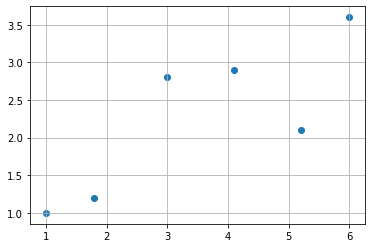

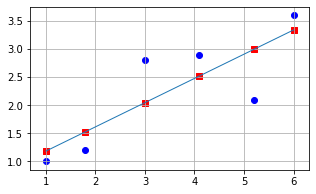

0.4668725550751491

In [3]:
#Workshop 3 : เปรียบเทียบประสิทธิภาพ 2 model
import matplotlib.pyplot as plt
x_data = [1.0,1.8,3.0,4.1,5.2,6.0]
y_data = [1,1.2,2.8,2.9,2.1,3.6]
x=np.array(x_data).reshape(-1,1)
y=np.array(y_data).reshape(-1,1)
plt.scatter(x,y)
plt.grid()
plt.show()
model.fit(x,y)
y_predict = model.predict(x)

plt.rcParams['figure.figsize'] = 5,3
plt.grid()
plt.scatter(x, y,color='b')
plt.plot(x, y_predict, linewidth='1')
plt.scatter(x,y_predict,color='r',marker='s')
plt.show()

#ประเมิณ model
# R2
model.score(x,y) #ค่าที่ได้
# MSE
mean_squared_error(y,y_predict) # ค่าที่ได้
# MAE
mean_absolute_error(y,y_predict) #ค่าที่ได้

#เมื่อเทียบกับ model แรก r2 ของ model ที่ 2 จะมีค่า 0.67 มีความผิดพลาดสูงมาก

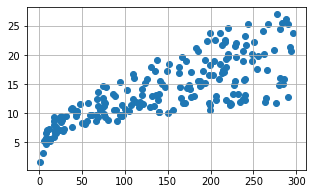

array([[21.29358568],
       [30.80091377],
       [54.56923398]])

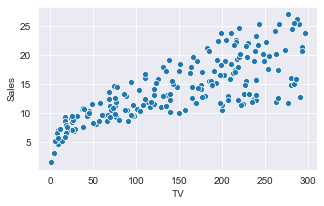

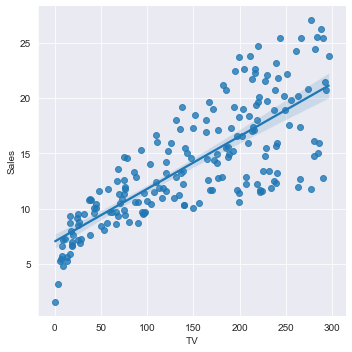

In [4]:
#Workshop 4 : พยากรณ์ผลการโฆษณา TV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # ถ้าใช้ matplotlib อย่างเดียว ก็ไม่ต้อง import seaborn

df = pd.read_csv('advertising.csv', usecols = ['TV','Sales'])
df.head()
df.shape
df.isnull().sum()

x = df.TV.values.reshape(-1,1)
y = df.Sales.values.reshape(-1,1)
x[:5]
y[:5]
plt.scatter(x,y)
plt.grid()
plt.show()
sns.set_style('darkgrid') # Seaborn
sns.scatterplot(df.TV,df.Sales)

#สร้าง model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = LinearRegression()
model.fit(x,y)
model.coef_ , model.intercept_ # ค่า m and b
#Y = (0.0475*X) +7.03259

#ประเมิณความแม่นยำหรือค่คลาดเคลื่อน model
model.score(x,y) # 0.6118
y_predict = model.predict(x)
mean_squared_error(y,y_predict) # 10.5126 MSE
mean_absolute_error(y,y_predict) # 2.5498 MAE
# Data Visualization
sns.lmplot(x='TV', y='Sales',data=df) # ใช้ข้อมูล df จาก dataFrame ที่อ่านมาได้
x_input = [[300],
    [500],
    [1000]]
y_predict = model.predict(x_input)
y_predict




In [5]:
# Workshop 5 : Multiple Linear Regression

df = pd.read_csv('advertising.csv', index_col=0)
df.head()

#Data Visualization
#sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',height=4)
#plt.show()
#sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',height=4, kind='reg')
#plt.show()
#g = sns.pairplot(df)
#g.fig.set_size_inches(9,9)
# ให้ดู pairplot ที่แกน y ที่สนใจในกรณีนี้สนใจ sales จะพอมองความสัมพันธ์ได้
# สร้าง Model
feature_cols = ['TV','Radio','Newspaper']
X = df[feature_cols]
y = df.Sales

model = LinearRegression()
model.fit(X,y)
print(model.coef_)
print(model.intercept_)
list(zip(feature_cols, model.coef_)) #รวมข้อมูลเป็น list เดัยวกัน
# ค่าสมการ
# Y = (.0458*TV) + (.1885*Radio) + (-.001*Newspaper) + 2.939
model.score(X,y) # ค่า R**2 score ที่ได้ มีความแม่นยำ 89%
# predict
x_input = [[300,0,0],[0,300,0],[0,0,300],[100,200,200],[100,200,0]]
model.predict(x_input)
# การลงทุน Radio จะคุ้มสุด รองลงมาคือ TV ส่วน Newspaper ถือว่าไม่คุ้ม
# เปรียบเทียบ เคส 4ลงทุนรวม500 เคส5 ลงทุนรวม 300 โดยตัดงบ Newspaper ออกไปผลลัพธ์ที่ได้แทบไม่ต่าง 

[ 0.04576465  0.18853002 -0.00103749]
2.9388893694594085


array([16.66828301, 59.49789444,  2.62764146, 45.01385869, 45.2213573 ])

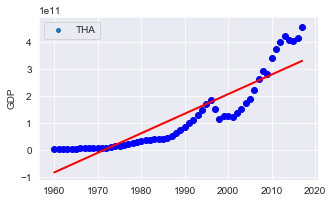

R2 = 0.81300
MSE= 3.3677e+21
RSME = 5.8032e+10
3.504274E+11


In [6]:
# Workshop 6 : ทำนายค่า GDP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('gdp4c.csv', index_col=0)
df.head()
df.tail()
df.describe()
df
df.shape
df.isnull().sum()
#Data Visualization
#ใข้seaborn
sns.set_style('darkgrid') # ตั้งค่ารูปแบบพื้นสีเทา

#sns.scatterplot(df.index,df.THA,label = 'THA')
#sns.scatterplot(df.index,df.USA,label = 'USA')
#sns.scatterplot(df.index,df.SGP,label = 'SGP')
#sns.scatterplot(df.index,df.VNM,label = 'VNM')
#plt.ylabel('GDP')

sns.scatterplot(df.index,df.THA,label = 'THA')
plt.ylabel('GDP')
#เตรียมข้อมูลสำหรับการ Train
x = df.index.values.reshape(-1,1)
y = df.THA
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
y_predict = model.predict(x) # y ที่ได้จากการทำนาย Predict(คำนวณจาก Model)
plt.scatter(x, y, color='b') # x,y ข้อมูลจริง
plt.plot(x, y_predict, linewidth='2',color='r') # ได้จาก Prediction
plt.show()

#ประเมินความแม่นยำ Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
print('R2 = {:.5f}'.format(model.score(x,y)))
print('MSE= {:.4e}'.format(mean_squared_error(y,y_predict))) # e คือ ทศนิยม4ตำแหน่ง expronet 10*21
print('RSME = {:.4e}'.format(np.sqrt(mean_squared_error(y,y_predict))))
#ทำนาย
y_predict = model.predict([[2020]])
print('{:,.6E}'.format(y_predict[0])) # GDP 2020


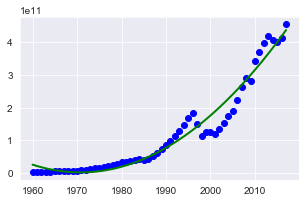

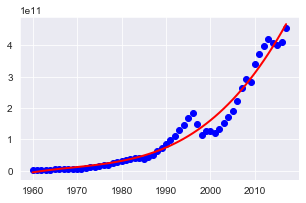

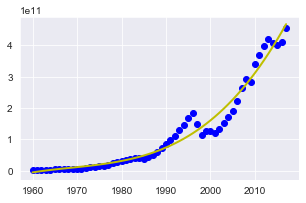

R2 : degree 2 = 0.95797
MSE : degree 2 7.5696e+20
RMSE : degree 2 2.7513e+10
R2 : degree 3 = 0.96689
R2 : degree 4 = 0.96692


In [7]:
#Workshop 7 : ทำนาย GDP ด้วย Polynomial Regression
from sklearn.linear_model import LinearRegression # ของเดิม
from sklearn.preprocessing import PolynomialFeatures # เพิ่มส่วนนี้เพื่อปรับแต่ง
poly_features = PolynomialFeatures(degree = 2)
x_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred2 = model.predict(x_poly) # y ที่ได้จากการทำนาย Predict(คำนวณจาก Model)
plt.scatter(x, y, color='b') # x,y ข้อมูลจริง
plt.plot(x, y_poly_pred2, linewidth='2',color='g') # ได้จาก Prediction
plt.show()

poly_features = PolynomialFeatures(degree = 3)
x_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred3 = model.predict(x_poly) # y ที่ได้จากการทำนาย Predict(คำนวณจาก Model)
plt.scatter(x, y, color='b') # x,y ข้อมูลจริง
plt.plot(x, y_poly_pred3, linewidth='2',color='r') # ได้จาก Prediction
plt.show()

poly_features = PolynomialFeatures(degree = 4)
x_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred4 = model.predict(x_poly) # y ที่ได้จากการทำนาย Predict(คำนวณจาก Model)
plt.scatter(x, y, color='b') # x,y ข้อมูลจริง
plt.plot(x, y_poly_pred4, linewidth='2',color='y') # ได้จาก Prediction
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


#print('R2 : degree 2 = {:.5f}'.format(model.score(x_poly,y)))
print('R2 : degree 2 = {:.5f}'.format(r2_score(y,y_poly_pred2)))

print('MSE : degree 2 {:.4e}'.format(mean_squared_error(y,y_poly_pred2)))
print('RMSE : degree 2 {:.4e}'.format(np.sqrt(mean_squared_error(y,y_poly_pred2))))

print('R2 : degree 3 = {:.5f}'.format(r2_score(y,y_poly_pred3)))

print('R2 : degree 4 = {:.5f}'.format(r2_score(y,y_poly_pred4)))



In [8]:
#predict
x_input = [[2015],[2018],[2020]]
y_poly_pred = model.predict(poly_features.fit_transform(x_input))

for val in y_poly_pred:
    print('{:.4e}'.format(val)) #ได้ค่า GDP 3ปี

print('%Error = ',abs(df.THA[2015]-y_poly_pred[0])*100/df.THA[2015])
df.tail()
#ที่ปี 2015 error จะอยู่ที่ 4.26%

4.1852e+11
4.9380e+11
5.4910e+11
%Error =  4.264098997755351


,SGP,THA,USA,VNM
2013,3.044540e+11,4.203330e+11,1.669150e+13,1.712220e+11
2014,3.115390e+11,4.073390e+11,1.742760e+13,1.862050e+11
2015,3.040980e+11,4.013990e+11,1.812070e+13,1.932410e+11
2016,3.097640e+11,4.117550e+11,1.862450e+13,2.052760e+11
2017,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


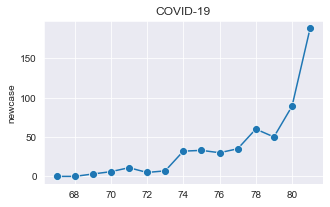

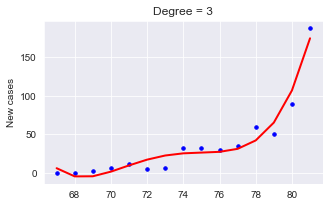

R2 = 0.95001
175
3741
87374
945521
Error at Day 81 : 7.01%


In [62]:
#Workshop 8 : ทำนายผู้ติดเชื้อ COVID-19
# date : บันทึกข้อมูล(เริ่มต้นข้อมูลแถวแรก date คือ 1/1/2020)
# newcase : คือตำนวนผู้ติดเชื้อรายวันที่เพิ่มขึ้น ณ วันที่การบันทึก ซึ่งได้รับการยืนยัน เป็นทางการแน่นอน(ยืนยันจากผลLab)
# death : จำนวนผู้เสียชีวิตรายวัน(ณ วันที่ทำการบันทึก)

#เริ่มต้น import อ่านข้อมูล
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('covid19.csv')
df.tail()
#ช่วง 67วันแรกไม่มีกาติดเชื้อ จึงจะเลือกข้อมูลเฉพาะตั้งแต่วันที่ 67 เป็นต้นไป
df=df[df.index>=67]
df

# พล็อตกราฟดูแนวโนม
plt.figure(figsize=(5,3))
sns.lineplot(df.index,'newcase' ,data=df,marker='o',markersize=8)
plt.title('COVID-19')
plt.show()

# เตรียมข้อมูล x (เลขวันที่) และ y จำนวนผู้ติดเชื้อ เพื่อเตรียม Train สร้าง Model
x = df.index.values.reshape(-1,1)
y = df.newcase
x[:5] , y[:5]

#ทำการ Train สร้าง Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 4)
x_poly = poly_features.fit_transform(x) # Fit Po;ynomial Regressionเข้ากับชุดข้อมูล
model = LinearRegression()
model.fit(x_poly,y)


#พล็อตเส้นโค้งที่ได้จาก Model เทียบกับจุดข้อมูลจริง(จุดกลม)
y_poly_pred = model.predict(x_poly)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 5,3 
plt.scatter(x, y, color='b', s=12) #จุดข้อมูลจริง
plt.plot(x, y_poly_pred, linewidth='2', color = 'r') #เส้นจาก model
plt.ylabel('New cases')
plt.title('Degree = 3')
plt.show()

#ประเมิน Model โดยคำนวณหาค่า R**2
from sklearn.metrics import r2_score
print('R2 = {:.5f}'.format(r2_score(y,y_poly_pred)))

#ต้องการเปรียบเทียบ model ทดสอบค่าจริง
# 81 : ลำดับวันที่บันข้อมูลสุดท้าย คือ วันที่ 22/3/2020 (จริงๆแล้วมีอยู๋แล้วเพื่อเปรียบเทียบกับค่าจริง)
# 90 :ประมาณอีก 10 วันจากค่าสุดท้าย
# 110 : ประมาณอีก 30 วัน
# 140 : ประมาณอีก 60 วัน

# วันที่ต้องการทำนาย 81 90 110 140
x_input = [[81],[90],[110],[140]] #เมทริกซ์เขียนแบบบรรทัดเดียว
# เริ่มทำนาย
y_poly_pred = model.predict(poly_features.fit_transform(x_input))
y_poly_pred
for val in y_poly_pred:
    print('{:.0f}'.format(val))


error = abs(y_poly_pred[0]-188)/188*100
print ('Error at Day 81 : {:.2f}%'.format(error))

#Overfitting & Underfitting
#Overfitting เกิดจาก degree มีมากเกินไปทำให้กราฟเลี้ยวโค้งครบทุกจุดของข้อมูล ถึงแม้จะมีความแม่นยำสูง แต่เมื่อนำผลไปทำนายจริงจะทำให้ผลผิดเพี้ยนเพราะ fit กับข้อมูลจริงมากเกินไปไม่มีความเป็นอสิระ
#Underfitting เกิดจาก degree ของกราฟต่ำเกินไปทำให้ผลทำนายมีความผิดพลาดมาก